In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [2]:
olympic_df = pd.read_csv('Olympic_Swimming_Results_1912to2020.csv')
olympic_df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4354,Stockholm,1912,4x100,Freestyle,1,Women,SWE,"Greta Carlsson, Vera Thulin, Sonja Johnsson, G...",NaN,5
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


In [3]:
olympic_df['Team'].value_counts().head(20)

Team
USA    896
AUS    451
GBR    289
JPN    249
GER    227
CAN    199
HUN    173
GDR    144
SWE    143
FRA    139
NED    137
URS    136
ITA    126
CHN    121
RUS     77
FRG     76
BRA     61
DEN     56
RSA     51
ROU     43
Name: count, dtype: int64

In [4]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB


In [5]:

olympic_df.describe()

,Year,Relay?,Rank
count,4359.000000,4359.000000,4359.000000
mean,1982.936453,0.169764,3.164946
std,26.928344,0.375468,1.189715
min,1912.000000,0.000000,0.000000
25%,1968.000000,0.000000,2.000000
50%,1988.000000,0.000000,4.000000
75%,2004.000000,0.000000,4.000000
max,2020.000000,1.000000,5.000000


In [6]:
olympic_df.columns

Index(['Location', 'Year', 'Distance (in meters)', 'Stroke', 'Relay?',
       'Gender', 'Team', 'Athlete', 'Results', 'Rank'],
      dtype='object')

In [7]:

olympic_df.shape

(4359, 10)

In [8]:
olympic_df.isnull().sum()

Location                 0
Year                     0
Distance (in meters)     0
Stroke                   0
Relay?                   0
Gender                   0
Team                     0
Athlete                 14
Results                 28
Rank                     0
dtype: int64

In [9]:

# Convert 'Results' column to numeric
olympic_df['Results'] = pd.to_numeric(olympic_df['Results'], errors='coerce')

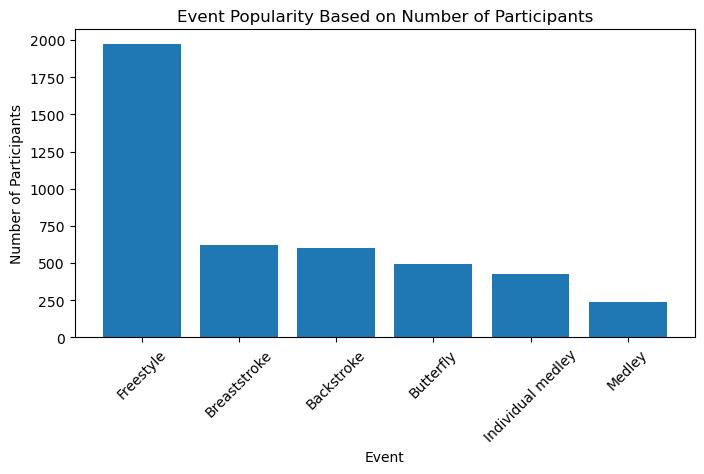

In [10]:
# Count the number of participants in different events
event_popularity = olympic_df['Stroke'].value_counts().reset_index()
event_popularity.columns = ['Event', 'Number of Participants']

# Plot the number of participants in different events
plt.figure(figsize=(8, 4))
plt.bar(event_popularity['Event'], event_popularity['Number of Participants'])
plt.xlabel('Event')
plt.ylabel('Number of Participants')
plt.title('Event Popularity Based on Number of Participants')
plt.xticks(rotation=45)
plt.show()